### Importing libraries

In [190]:
%reset -f

from functions import *

import pickle

from sklearn.preprocessing import scale, StandardScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [191]:
# Starting time
t0 = time()

input_path = "./dataset/cleaned/"
input_filename = "dataset_rfm.csv"

### Importing dataset

In [192]:
dataset_rfm = load_data(input_path, input_filename)

___Loading raw dataset___
Initial shape : (95420, 4)


In [193]:
dataset_rfm

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90
2,0000f46a3911fa3c0805444483337064,541,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00
...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,1570.00
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89
95417,ffff371b4d645b6ecea244b27531430a,572,1,89.90
95418,ffff5962728ec6157033ef9805bacc48,123,1,115.00


In [194]:
X = dataset_rfm.drop("customer_unique_id", axis=1).copy()
X

,Recency,Frequency,Monetary
0,115,1,129.90
1,118,1,18.90
2,541,1,69.00
3,325,1,25.99
4,292,1,180.00
...,...,...,...
95415,451,1,1570.00
95416,266,1,64.89
95417,572,1,89.90
95418,123,1,115.00


#### Scaling

In [195]:
X_norm = X.copy()
X_norm[X_norm.columns] = scale(X)
print(X_norm.shape)

X_norm

(95420, 3)


,Recency,Frequency,Monetary
0,-0.833121,-0.161045,-0.057615
1,-0.813533,-0.161045,-0.567596
2,1.948293,-0.161045,-0.337415
3,0.537999,-0.161045,-0.535021
4,0.322537,-0.161045,0.172566
...,...,...,...
95415,1.360670,-0.161045,6.558813
95416,0.152779,-0.161045,-0.356298
95417,2.150696,-0.161045,-0.241392
95418,-0.780888,-0.161045,-0.126072


In [196]:
X_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Recency,95420.0,2.014970e-17,1.000005,-1.583972,-0.813533,-0.127974,0.714286,3.169242
Frequency,95420.0,1.407069e-15,1.000005,-0.161045,-0.161045,-0.161045,-0.161045,70.850618
Monetary,95420.0,-5.528194e-17,1.000005,-0.650525,-0.434358,-0.241392,0.057705,61.094607


___Density distribution___


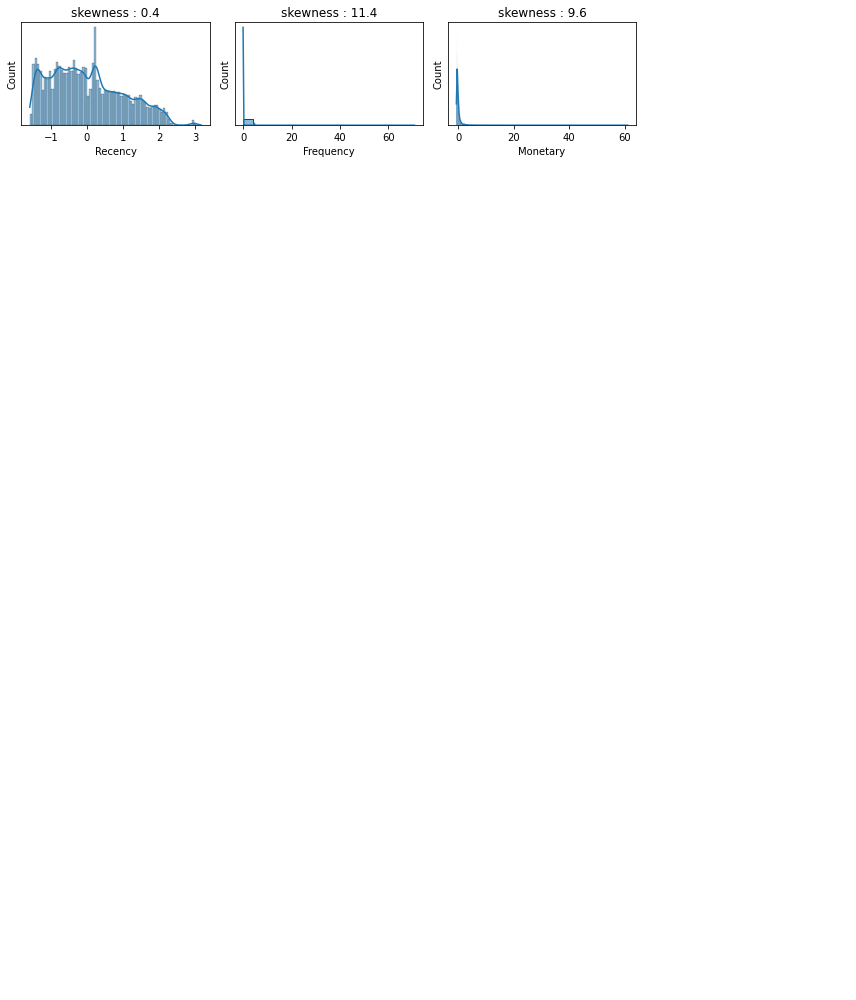

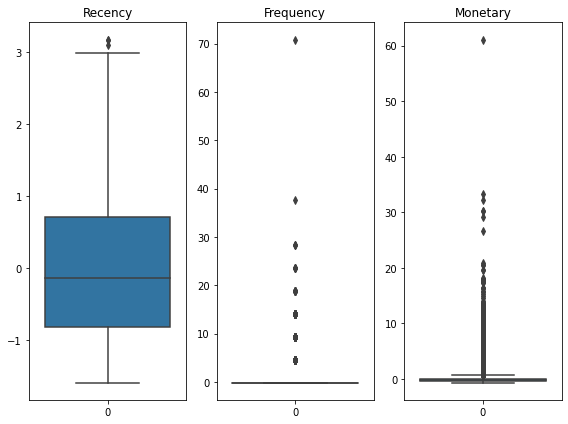

In [197]:
density_histplot(X_norm)
display_boxplot(X_norm)

#### Standardisation

In [198]:
X_std = X.copy()
scaler = StandardScaler()

X_std[X_std.columns] = scaler.fit_transform(X_std)
print(X_std.shape)

X_std

(95420, 3)


,Recency,Frequency,Monetary
0,-0.833121,-0.161045,-0.057615
1,-0.813533,-0.161045,-0.567596
2,1.948293,-0.161045,-0.337415
3,0.537999,-0.161045,-0.535021
4,0.322537,-0.161045,0.172566
...,...,...,...
95415,1.360670,-0.161045,6.558813
95416,0.152779,-0.161045,-0.356298
95417,2.150696,-0.161045,-0.241392
95418,-0.780888,-0.161045,-0.126072


In [199]:
X_std.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Recency,95420.0,2.014970e-17,1.000005,-1.583972,-0.813533,-0.127974,0.714286,3.169242
Frequency,95420.0,1.407069e-15,1.000005,-0.161045,-0.161045,-0.161045,-0.161045,70.850618
Monetary,95420.0,-5.528194e-17,1.000005,-0.650525,-0.434358,-0.241392,0.057705,61.094607


___Density distribution___


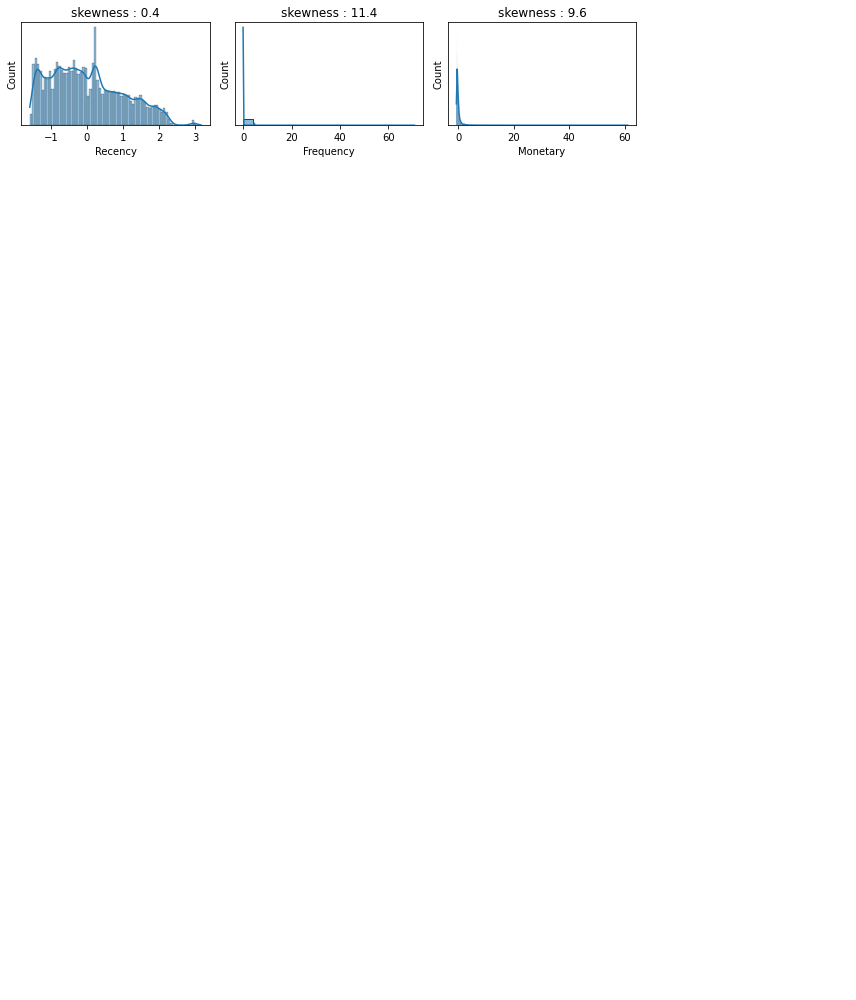

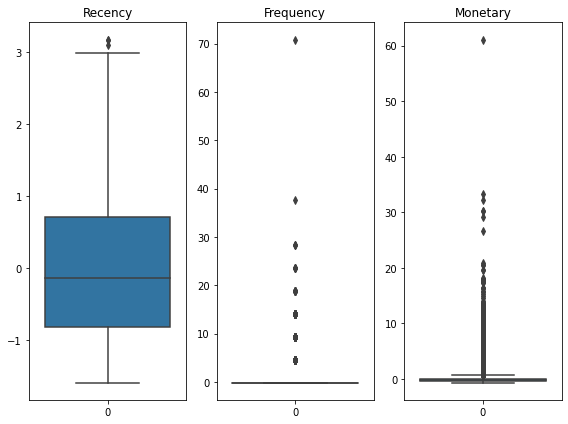

In [200]:
density_histplot(X_std)
display_boxplot(X_std)

##### Verifying that scale and std scaler are the same here

In [201]:
d = pd.concat([X_norm, X_std])
d

,Recency,Frequency,Monetary
0,-0.833121,-0.161045,-0.057615
1,-0.813533,-0.161045,-0.567596
2,1.948293,-0.161045,-0.337415
3,0.537999,-0.161045,-0.535021
4,0.322537,-0.161045,0.172566
...,...,...,...
95415,1.360670,-0.161045,6.558813
95416,0.152779,-0.161045,-0.356298
95417,2.150696,-0.161045,-0.241392
95418,-0.780888,-0.161045,-0.126072


In [202]:
d.drop_duplicates(keep=False)

,Recency,Frequency,Monetary


In [203]:
X_norm = X_norm.iloc[:200,:]
X_norm

,Recency,Frequency,Monetary
0,-0.833121,-0.161045,-0.057615
1,-0.813533,-0.161045,-0.567596
2,1.948293,-0.161045,-0.337415
3,0.537999,-0.161045,-0.535021
4,0.322537,-0.161045,0.172566
...,...,...,...
195,-0.859237,-0.161045,-0.553813
196,-1.009408,-0.161045,-0.061750
197,0.009138,-0.161045,-0.424847
198,-0.434843,-0.161045,-0.404494


### PCA : Principal Component Analysis

In [266]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X_norm)
print(pca.explained_variance_ratio_.cumsum())

[0.53010399 0.83022092]


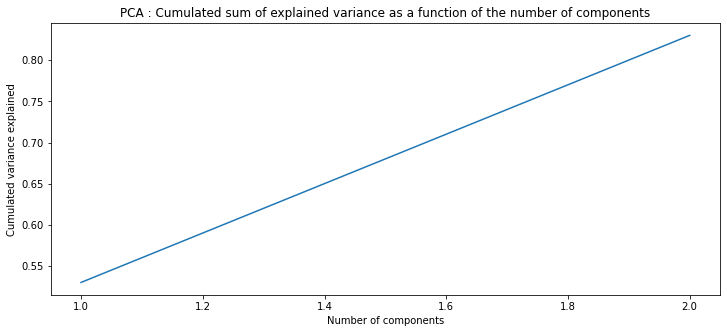

In [267]:
plt.figure(figsize=(12,5))
plt.title('PCA : Cumulated sum of explained variance as a function of the number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulated variance explained')

plt.plot(np.arange(start=1, stop=pca.n_components + 1),
         np.cumsum(pca.explained_variance_ratio_))

In [268]:
print("List of variance explained per component :", pca.explained_variance_ratio_)
print("Sum of the variance explained per component :", pca.explained_variance_ratio_.sum())

List of variance explained per component : [0.53010399 0.30011694]
Sum of the variance explained per component : 0.8302209234280433


In [269]:
# projeter X sur les composantes principales
X_pca = pca.transform(X_norm)
print("The PCA with 2 components explains", pca.explained_variance_ratio_.cumsum()[1], "% of the variance.")

The PCA with 2 components explains 0.8302209234280433 % of the variance.


In [270]:
X_pca

array([[-7.42386003e-01, -1.14628249e-01],
       [-6.45306285e-01, -6.14907252e-01],
       [ 2.04610351e+00,  3.91569813e-02],
       [ 6.83972234e-01, -3.73852504e-01],
       [ 3.63400182e-01,  2.91170166e-01],
       [-5.33668451e-01,  2.99706095e-02],
       [-5.42097178e-01, -5.56533939e-01],
       [-4.61313977e-01,  1.10012123e+00],
       [ 2.03855178e+00,  3.44475650e-01],
       [-3.44584512e-01, -1.68442171e-01],
       [ 1.24676360e+00, -3.41880003e-01],
       [ 4.01911045e-01, -1.71839583e-01],
       [-3.83445795e-01, -4.29712155e-01],
       [-5.87278295e-01, -3.92246122e-01],
       [ 1.04788126e+00, -8.00324491e-02],
       [ 7.61454874e-01, -3.19878776e-01],
       [ 2.99256811e-01, -4.90233968e-01],
       [ 1.21164786e-01, -4.48459035e-01],
       [ 9.02181533e-01,  6.06797755e-01],
       [-9.89857707e-01, -4.78452520e-01],
       [-1.32578295e+00, -7.39748699e-01],
       [-7.24883079e-01, -6.55323441e-01],
       [-1.34788926e+00,  5.14558968e-01],
       [ 1.

##### projection

(-0.7, 0.7)

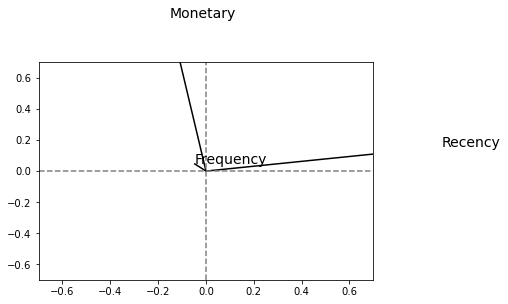

In [271]:
pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, X_norm.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

### t-SNE

In [205]:
tsne = TSNE(n_components=2, init='pca')
X_tsne = tsne.fit_transform(X_norm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


### K-Means Clustering

#### First tryout

In [206]:
kmeans_cluster = KMeans(n_clusters=3, verbose=0, random_state=0)
kmeans_cluster.fit(X_norm)

# kmeans_cluster.labels_

KMeans(n_clusters=3, random_state=0)

In [207]:
kmeans_cluster.inertia_

169.8517877201389

In [208]:
silh = silhouette_score(X_norm, kmeans_cluster.labels_)
silh

0.48900820361216174

##### Visualizing

Text(0.5, 1.0, 'Principal Components projection with t-SNE')

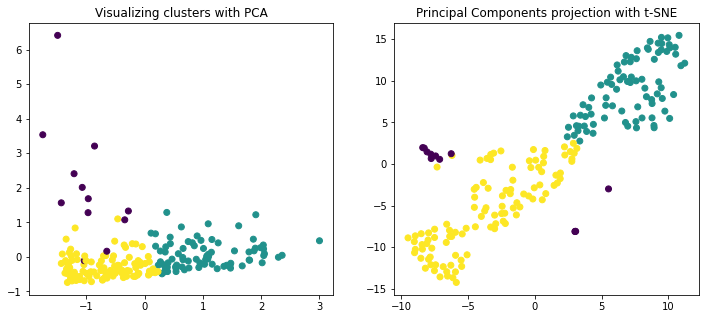

In [209]:
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121) # 1 en ordonnée / 2 en abcs / celle là la premiere
ax.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=kmeans_cluster.labels_) # colorier en fct etiquette deu clusterning
plt.title("Visualizing clusters with PCA")

ax = fig.add_subplot(122) # 1 en ordonnée / 2 en abcs / celle là la premiere
ax.scatter(x=X_tsne[:,0], y=X_tsne[:,1], c=kmeans_cluster.labels_) # palette=sns.color_palette("hls", n_colors=num_clusters)
plt.title('Principal Components projection with t-SNE')


<AxesSubplot:>

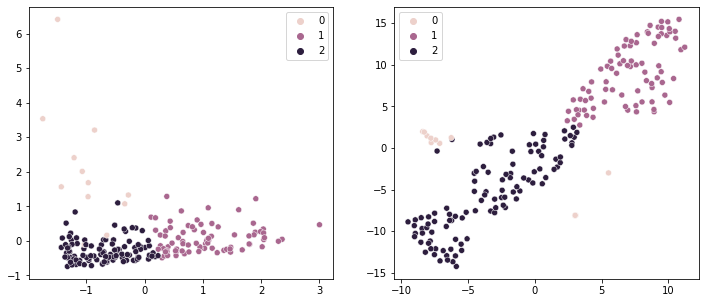

In [210]:
plt.figure(figsize=(12, 5))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=kmeans_cluster.labels_,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x=X_tsne[:,0], y=X_tsne[:,1],
    hue=kmeans_cluster.labels_,
    ax=ax2
)

#### Searching the best number of clusters K

In [211]:
inertia = {}
dict_kmeans = {}

for num_clusters in range(1, 25):
    print("\n\nTrying K =", num_clusters, end='\n')
    kmeans_cluster = KMeans(n_clusters=num_clusters,
                    verbose=1,
                    random_state=0).fit(X_norm)
    inertia[num_clusters] = kmeans_cluster.inertia_
    dict_kmeans[num_clusters] = kmeans_cluster



Trying K = 1
Initialization complete
Iteration 0, inertia 488.0106108057137.
Iteration 1, inertia 387.6548389464017.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1208.8946000191554.
Iteration 1, inertia 387.6548389464017.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 797.3135720937092.
Iteration 1, inertia 387.6548389464017.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 433.9576194668807.
Iteration 1, inertia 387.6548389464017.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 654.3996779407909.
Iteration 1, inertia 387.6548389464017.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 558.737780377259.
Iteration 1, inertia 387.6548389464017.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 506.6990694199342.
Iteration 1, inertia 

In [212]:
inertia

{1: 387.6548389464017,
 2: 241.70572094283813,
 3: 169.8517877201389,
 4: 104.92713890492568,
 5: 73.60277308914918,
 6: 56.77881401517722,
 7: 44.89623162717278,
 8: 38.74593166652275,
 9: 31.355332159356067,
 10: 26.802958480153617,
 11: 23.828696703837903,
 12: 21.343452180423295,
 13: 19.401264572229547,
 14: 17.128452665813658,
 15: 15.930916331318363,
 16: 14.975955431558402,
 17: 14.417631667282786,
 18: 12.974209096375237,
 19: 12.042738412103272,
 20: 10.99342813210165,
 21: 10.172754552442312,
 22: 9.475010694283839,
 23: 9.041439532786999,
 24: 8.18409273833904}

K-Means minimises the inertia / intra-custer Variance.


<AxesSubplot:title={'center':'K-Means: The sum of inertia as a function of the number of clusters.'}>

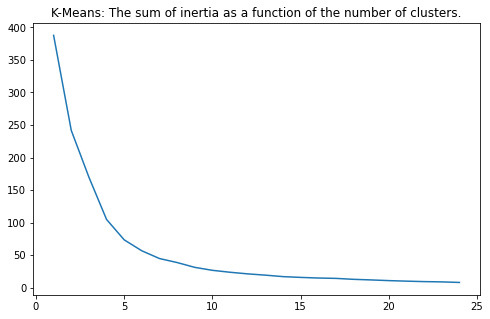

In [213]:
print("K-Means minimises the inertia / intra-custer Variance.")

plt.figure(figsize=(8, 5))
plt.title('K-Means: The sum of inertia as a function of the number of clusters.')
sns.lineplot(x=list(inertia.keys()), y=list(inertia.values()))

We want the silhouette score to be close to 1.


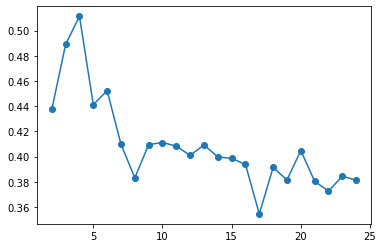

In [214]:
silhouettes = []
for num_clusters in range(2, 25):
    cls = KMeans(n_clusters=num_clusters, random_state=0) # #init='random', n_init=1)
    cls.fit(X_norm)
    silh = silhouette_score(X_norm, cls.labels_)
    silhouettes.append(silh)

print("We want the silhouette score to be close to 1.")
plt.plot(range(2, 25), silhouettes, marker='o')

### Hierarchical clustering

In [215]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_cls = AgglomerativeClustering().fit(X_norm) # n_clusters=5

In [216]:
hierarchical_cls

AgglomerativeClustering()

In [217]:
hierarchical_cls.labels_

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1], dtype=int64)

In [218]:
hierarchical_cls.n_clusters

2

Text(0.5, 1.0, 'Principal Components projection with t-SNE')

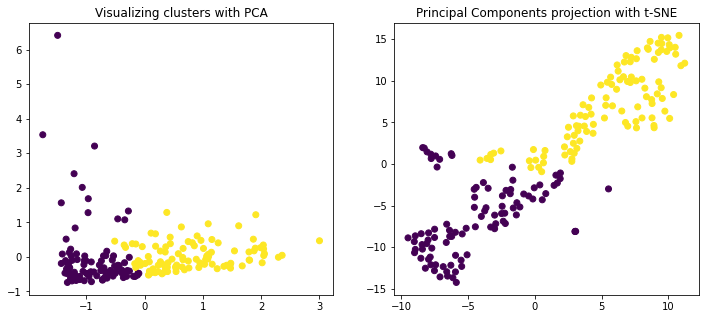

In [219]:
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121) # 1 en ordonnée / 2 en abcs / celle là la premiere
ax.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=hierarchical_cls.labels_) # colorier en fct etiquette deu clusterning
plt.title("Visualizing clusters with PCA")

ax = fig.add_subplot(122) # 1 en ordonnée / 2 en abcs / celle là la premiere
ax.scatter(x=X_tsne[:,0], y=X_tsne[:,1], c=hierarchical_cls.labels_) # palette=sns.color_palette("hls", n_colors=num_clusters)
plt.title('Principal Components projection with t-SNE')


In [220]:
silhouette_score(X_norm, hierarchical_cls.labels_)

0.4218310700041074

In [221]:
# End of simulation time
t1 = time()
print("computing time : {:8.6f} sec".format(t1 - t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1 - t0)))

computing time : 87.507235 sec
computing time : 00:01:27
